In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
# 列ヘッダー名の設定
col_header = ('HV','Audience','Result','Rank','Savings','Hits','Home Runs','Stolen Bases','Strikeouts',
                     'Hits Allowed','Home Runs Allowed','Runs Allowed','Earned Runs','K')
# csvファイルから取得する列番号のリスト
col_num = [6,7,8,9,10,18,19,20,21,22,23,24,25,26]
# データ取得が可能な年度のリスト
years = [2014,2015,2016,2017,2018]
# チーム名頭文字のリスト
teams = ['Bs','C','D','DB','E','F','G','H','L','M','S','T']

In [128]:
# 勝敗を数値（敗：0 勝：1）へ変換する関数
def classify_victory_or_defeat(result):
    if result == '●':
        return 0
    elif result == '○':
        return 1

In [129]:
# 2012〜2018年の全チームの試合結果DataFrameを作成する関数
def combine_match_results():
    df_all = pd.DataFrame(index=[],columns=[])
    
    for year in years:
        for team in teams:
            # csvファイルのデータをDataFrameへ格納
            df = pd.read_csv('csv/{y}/{y}_{t}_match_results.csv'.format(y=year,t=team),
                                      sep=',',names=col_header,usecols=col_num)

            # NaNと引き分けを除外
            for i in range(len(df)):
                if pd.isnull(df.loc[i,'Result']) or df.loc[i,'Result'] == '△':
                    df = df.drop(i)

            # 関数match_result_classifyを適用
            df['Result'] = df['Result'].apply(classify_victory_or_defeat)

            df_all = pd.concat([df_all,df],ignore_index=True)
            
    return df_all

In [130]:
df_all = combine_match_results()

In [131]:
df_all.shape

(8430, 14)

In [132]:
df_all.head(30)

,HV,Audience,Result,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
0,V,"26,236",1,2,18,9,1,1,12,8,0,2,2,7
1,V,"23,100",1,2,17,14,2,3,9,4,0,0,0,7
2,V,"38,561",0,2,16,8,0,1,9,6,0,2,2,8
3,V,"17,681",1,2,17,11,2,0,5,10,0,3,3,9
4,V,"19,129",1,2,16,10,1,1,4,6,1,4,3,8
5,V,"30,076",0,2,15,6,0,1,6,6,1,4,4,10
6,V,"37,837",0,2,16,6,0,2,7,12,1,3,3,6
7,H,"24,688",0,2,17,11,1,1,8,12,2,9,8,7
8,H,"18,221",1,2,18,8,0,3,4,6,0,1,1,10
9,H,"17,608",1,2,17,7,0,1,7,5,0,0,0,5


In [133]:
df_all.tail(30)

,HV,Audience,Result,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
8400,V,"42,851",0,2,2,5,0,1,9,6,1,3,3,7
8401,V,"42,526",1,2,3,7,3,0,7,5,0,0,0,9
8402,H,"46,593",1,2,2,9,0,2,6,15,2,5,5,8
8403,H,"46,638",1,3,1,11,1,4,5,8,0,2,2,6
8404,H,"46,636",0,3,0,9,0,2,6,9,0,5,1,6
8405,H,"46,596",1,2,1,7,0,1,5,8,0,2,2,8
8406,H,"45,924",1,4,0,13,1,0,7,6,0,1,1,9
8407,V,"31,794",1,4,-1,7,1,2,8,8,0,2,1,7
8408,V,"31,819",0,4,-2,6,1,2,6,7,2,5,5,10
8409,V,"31,732",0,4,-1,11,1,2,9,6,1,7,6,8


In [134]:
df_all['Result']

0       1
1       1
2       0
3       1
4       1
5       0
6       0
7       0
8       1
9       1
10      0
11      1
12      0
13      0
14      1
15      1
16      0
17      0
18      1
19      0
20      1
21      0
22      0
23      1
24      1
25      0
26      0
27      0
28      0
29      1
       ..
8400    0
8401    1
8402    1
8403    1
8404    0
8405    1
8406    1
8407    1
8408    0
8409    0
8410    1
8411    0
8412    0
8413    0
8414    1
8415    1
8416    1
8417    0
8418    0
8419    0
8420    1
8421    1
8422    0
8423    1
8424    0
8425    1
8426    1
8427    0
8428    0
8429    1
Name: Result, Length: 8430, dtype: int64

In [135]:
# 指定されたチーム・年度のDataFrameを作成する関数
def make_dataframe(team, year):
    FILENEME_TEMPLATE = "csv/{y}/{y}_{t}_match_results.csv"
    
    # csvファイルの内容をDataFrameに格納
    df = pd.DataFrame(index=[], columns=[])
    df = pd.read_csv(FILENEME_TEMPLATE.format(y=year, t=team),
                              sep=",", names=col_header, usecols=col_num)
    
    # NaNと引き分けを除外
    for i in range(len(df)):
        if pd.isnull(df.loc[i,'Result']) or df.loc[i,'Result'] == '△':
            df = df.drop(i)
    
    # 勝敗を数値に変換
    df['Result'] = df['Result'].apply(classify_victory_or_defeat)
    
    return df

In [136]:
df_Bs_2018 = make_dataframe("Bs", 2018)

In [137]:
df_Bs_2018.shape

(138, 14)

In [138]:
len(df_Bs_2018)

138

In [139]:
len(df_Bs_2018.columns)

14

In [140]:
df_Bs_2018.size

1932

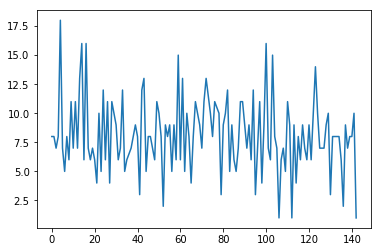

In [141]:
plt.plot(df_Bs_2018['Hits'])